# Compare the v3.4 recalibrated SDSS Stripe82 catalog 
# and the GALEX catalog

[Link to helper tools](#dataTools) 

[Link to data reading](#dataReading) 

[Link to data analysis](#dataAnalysis) 

In [1]:
%matplotlib inline
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
#from astroML.plotting import hist
# for astroML installation see https://www.astroml.org/user_guide/installation.html

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%load_ext autoreload
%autoreload 2
# importing ZI tools: 
import ZItools as zit
# importing Karun's tools: 
import KTtools as ktt

<a id='dataTools'></a>

### Helper Tools

In [3]:
# robust standard deviation
def sigG(arr):
    return 0.741*(np.quantile(arr, 0.75)-np.quantile(arr, 0.25))

In [4]:
# Due the relative noisiness of the GALEX results, we have increased the 
#  default Y-axis range for the delta_u plots to +/- 0.20 mags from the 
#  +/-0.07 mags for the CFIS jupyter notebook.

# Likewise, should probably increase the range for the delta_RA and 
#  delta_DEC to +/- 3.0 arcsec for the delta_RA and delta_DEC plots...

def doOneColor(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    xBin, nPts, medianBin, sigGbin = zit.fitMedians(xVec, yVec, 0.5, 3.1, 52, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(xVec, yVec, s=0.01, c='blue')
    ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.set_xlim(0.4,3.2)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    goodC = d[np.abs(d['colorresid'])<0.3]
    
    ### plots 
    # RA
    print(' stats for RA binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_RA.png'
    Ylabel =kw['Ystr'] + ' residuals'
    kwOC = {"Xstr":'raW', "Xmin":-52, "Xmax":45, "Xlabel":'R.A. (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-51.5, "XmaxBin":45, "nBin":56, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    zit.plotdelMag(goodC, kwOC)
    print('made plot', plotName)
    # Dec
    print('-----------')
    print(' stats for Dec binning medians:')
    plotName = plotNameRoot + '_Dec.png'
    kwOC = {"Xstr":'dec', "Xmin":-0.5, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBin":52, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    zit.plotdelMag(goodC, kwOC)
    Ylabel = 'residuals for ($u_{SDSS}$ - $u_{GALEX}$)'
    kwOC = {"Xstr":'dec', "Xmin":-0.5, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBin":52, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":0.05}
    color = 'colorresid' 
    kwOC["Ystr"] = color 
    kwOC["plotName"] = 'colorResidGALEXug_Dec_Hess.png'  
    kwOC["nBinX"] = 55
    kwOC["nBinY"] = 25
    kwOC["cmap"] = 'plasma'
    ktt.plotdelMagBW_KT(sdssGALEXug, kwOC)
    
    
    print('made plot', plotName)
    # r SDSS
    print('-----------')
    print(' stats for SDSS u binning medians:')
    plotName = plotNameRoot + '_umag.png'    
    kwOC = {"Xstr":'u_mMed', "Xmin":15.2, "Xmax":22.5, "Xlabel":'SDSS u (mag)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":16, "XmaxBin":22, "nBin":55, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    zit.plotdelMag(goodC, kwOC)
    print('made plot', plotName)
    print('------------------------------------------------------------------')

def doOneColorRA(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    xBin, nPts, medianBin, sigGbin = zit.fitMedians(xVec, yVec, 0.5, 3.1, 52, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(xVec, yVec, s=0.01, c='blue')
    ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.set_xlim(0.4,3.2)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    goodC = d[np.abs(d['colorresid'])<0.3]
    
    ### plots 
    # RA
    print(' stats for RA binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_RA.png'
    Ylabel = 'u band residuals (SDSS vs. GALEX, BP-RP)'
    kwOC = {"Xstr":'raW', "Xmin":-52, "Xmax":62, "Xlabel":'R.A. (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-48, "XmaxBin":45, "nBin":56, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    plotdelMag2(goodC, kwOC, True)
    print('made plot', plotName)   

    
def doOneColorDec(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    xBin, nPts, medianBin, sigGbin = zit.fitMedians(xVec, yVec, 0.5, 3.1, 52, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(xVec, yVec, s=0.01, c='blue')
    ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.set_xlim(0.4,3.2)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    goodC = d[np.abs(d['colorresid'])<0.3]
    
    ### plots 
    # Dec
    print('-----------')
    print(' stats for Dec binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_Dec.png'
    Ylabel = 'u band residuals (SDSS vs. GALEX, BP-RP)'
    kwOC = {"Xstr":'dec', "Xmin":-1.3, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBin":35, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    plotdelMag2(goodC, kwOC, False)
    print('made plot', plotName)
 



In [5]:
## a horrible hack to compare GALEX and SDSS results for the u band
def plotdelMag2(d, kw, RA=True):
 
    print('medianAll:', np.median(d[kw['Ystr']]), 'std.dev.All:', sigG(d[kw['Ystr']]))
    print('N=', np.size(d[kw['Ystr']]), 'min=', np.min(d[kw['Ystr']]), 'max=', np.max(d[kw['Ystr']]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(d[kw['Xstr']], d[kw['Ystr']], s=kw['symbSize'], c='black') 
    # binning
    xBinM, nPtsM, medianBinM, sigGbinM = zit.fitMedians(d[kw['Xstr']], \
                                         d[kw['Ystr']], kw['XminBin'], kw['XmaxBin'], kw['nBin'], 1)
    # plotting
    if (kw['offset'] >= 0):
        xL = np.linspace(kw['XminBin'], kw['XmaxBin'])
        ax.plot(xL, 0*xL, '-', c='red', linewidth=3)
        ax.plot(xL, 0*xL+kw['offset'], '--', c='red', linewidth=3)
        ax.plot(xL, 0*xL-kw['offset'], '--', c='red', linewidth=3)
    if (0):
        ax.scatter(xBinM, medianBinM, s=30.0, c='black', alpha=0.8)
        ax.scatter(xBinM, medianBinM, s=15.0, c='yellow', alpha=0.3)
    #
    TwoSigP = medianBinM + kw['Nsigma']*sigGbinM
    TwoSigM = medianBinM - kw['Nsigma']*sigGbinM 
    ax.plot(xBinM, TwoSigP, c='yellow', linewidth=3)
    ax.plot(xBinM, TwoSigM, c='yellow', linewidth=3)
    #
    rmsBin = np.sqrt(nPtsM) / np.sqrt(np.pi/2) * sigGbinM
    rmsP = medianBinM + rmsBin
    rmsM = medianBinM - rmsBin
    ax.plot(xBinM, rmsP, c='cyan', linewidth=3)
    ax.plot(xBinM, rmsM, c='cyan', linewidth=3)
    # 
    if (RA):
       # read back 
        zpRAgrid, zpRA = np.loadtxt('ZPcorrectionsRA_Gaia_uband_v3.2.dat')  
        ax.plot(zpRAgrid, zpRA, c='blue', linewidth=3)
        here = np.interp(xBinM, zpRAgrid, zpRA) - medianBinM 
        print(np.min(here), np.max(here), sigG(here))
    else:
        zpDecgrid, zpDec = np.loadtxt('ZPcorrectionsDec_Gaia_uband_v3.2.dat')   
        ax.plot(zpDecgrid, zpDec, c='blue', linewidth=3)
        here = np.interp(xBinM, zpDecgrid, zpDec) - medianBinM 
        print(np.min(here), np.max(here), sigG(here))



    ax.set_xlabel(kw['Xlabel'], fontsize=22)
    ax.set_ylabel(kw['Ylabel'], fontsize=22)
    ax.set_xlim(kw['Xmin'], kw['Xmax'])
    ax.set_ylim(kw['Ymin'], kw['Ymax'])
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.savefig(kw['plotName'], dpi=600)
    print('saved plot as:', kw['plotName']) 
    
    
    plt.show()
    return

In [6]:
# both new and old files use identical data structure
colnamesSDSS = ['calib_fla', 'ra', 'dec', 'raRMS', 'decRMS', 'nEpochs', 'AR_val', 
                'u_Nobs', 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2',
                'g_Nobs', 'g_mMed', 'g_mMean', 'g_mErr', 'g_rms_scatt', 'g_chi2',
                'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 'r_rms_scatt', 'r_chi2',
                'i_Nobs', 'i_mMed', 'i_mMean', 'i_mErr', 'i_rms_scatt', 'i_chi2',
                'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']

### code for generating new quantities, such as dra, ddec, colors, differences in mags, etc
def derivedColumns(matches):
    matches['dra'] = (matches['ra_sdss']-matches['ra_galex'])*3600
    matches['ddec'] = (matches['dec_sdss']-matches['dec_galex'])*3600
    ra = matches['ra_sdss'] 
    matches['raW'] = np.where(ra > 180, ra-360, ra) 
    matches['ug'] = matches['u_mMed'] - matches['g_mMed']
    matches['gr'] = matches['g_mMed'] - matches['r_mMed']
    matches['ri'] = matches['r_mMed'] - matches['i_mMed']
    matches['gi'] = matches['g_mMed'] - matches['i_mMed']
    matches['iz'] = matches['i_mMed'] - matches['z_mMed']
    matches['NUVg'] = matches['NUV_MAG'] - matches['g_mMed']
    ## Original/Old transformation from GALEX NUV and SDSS g,i to SDSS u...
    #matches['u_est'] = matches['NUV_MAG'] \
    #                    + 0.939  \
    #                    - 1.008*matches['NUVg'] + 0.017*matches['NUVg']*matches['NUVg'] \
    #                    - 0.599*matches['gi'] + 0.860*matches['gi']*matches['gi']
    #New (7 Dec 2020) transformation from GALEX NUV and SDSS g,i to SDSS u...
    # Includes correction for E(B-V) > 0.15...
    matches['ebv_mask'] = 0
    matches['ebv_mask'][ (matches['E_BV'] > 0.15) ] = 1
    #matches[ (matches['E_BV'] > 0.15) ]
    # We keep a version of "u_est" and of "du_est" without the E(B-V) correction, for sanity checks...
    #  "u_est_no_ebv" is the no-E(B-V) version of "u_est"
    matches['u_est_no_ebv'] = matches['NUV_MAG'] \
                        + 0.864  \
                        - 0.999*matches['NUVg'] + 0.015*matches['NUVg']*matches['NUVg'] \
                        - 0.426*matches['gi'] + 0.821*matches['gi']*matches['gi']
    #  "u_est" is the with-E(B-V) version of "u_est and is the version generally to be used..."
    matches['u_est'] = matches['u_est_no_ebv'] \
                        - 1.23286*(matches['E_BV']-0.15)*matches['ebv_mask'] \
                        + 3.43015*(matches['E_BV']-0.15)*(matches['E_BV']-0.15)*matches['ebv_mask']
    
    #  "du_est_no_ebv" is the no-E(B-V) version of "du_est"
    matches['du_est_no_ebv'] = matches['u_mMed'] - matches['u_est_no_ebv']
    #  "du_est" is the with-E(B-V) version of "du_est and is the version generally to be used..."
    matches['du_est'] = matches['u_mMed'] - matches['u_est']
    
    return

<a id='dataReading'></a>

### Define paths and catalogs 

In [7]:
#ZIdataDir = "/Users/ivezic/Work/Science/CalibrationV2/SDSS_SSC/Data"
ZIdataDir = "/data/des40.a/data/dtucker/Stripe82Stds/SDSSSSC/allDataThanjavurPaper"
# original analysis
# SDSScatalog = ZIdataDir + "/" + "stripe82calibStars_v3.2.dat" 
# final analysis
# SDSScatalog = ZIdataDir + "/" + "stripe82calibStars_v3.2_noheader_final.dat"
SDSScatalog = ZIdataDir + "/" + "stripe82calibStars_v3.4.dat"
# GALEX catalog (from Sahar and Douglas)
GALEXcatalog = ZIdataDir + "/" + "sdssdr13Stripe82_GALEX_matches.csv" 
#colnamesGALEX = ['ra', 'dec', 'upsf', 'uauto', 'upsfErr', 'uautoErr', 'sg']
colnamesGALEX = ['RA', 'DEC', 'NUV_MAG', 'NUV_MAGERR', 'NUV_CLASS_STAR', 'E_BV']
# Use pandas to grab just a certain subset of columns from GALEXcatalog...
galex_df = pd.read_csv(GALEXcatalog, usecols=colnamesGALEX)
galex_df.rename(columns = {'RA':'ra', 'DEC':'dec'}, inplace=True)
galex = Table.from_pandas(galex_df)
#cfis = Table.read(GALEXcatalog, format='csv', names=colnamesGALEX) 

In [8]:
galex 

ra,dec,E_BV,NUV_MAG,NUV_MAGERR,NUV_CLASS_STAR
float64,float64,float64,float64,float64,float64
42.89196701147516,1.793531441282304,0.0582555,21.5928,0.328077,0.933333
42.89669331127612,1.7986446905121398,0.0591237,21.1631,0.274865,0.978427
43.05425851668599,1.673575603553882,0.0574201,20.8191,0.214602,0.985713
43.072230276536686,1.669551883137387,0.057865699999999985,20.791999999999998,0.217858,0.995538
43.284502956605216,1.5782320957720042,0.0702362,21.6891,0.329339,0.973925
43.29518958828696,1.491910505606,0.0766957,21.3183,0.287582,0.982816
43.30032020964165,1.557958161229523,0.07347619999999999,21.7769,0.347754,0.978352
43.32392111594822,1.647121662709336,0.0707877,20.8264,0.204293,0.979196
43.330915044186284,1.664367466343354,0.07341139999999999,21.9211,0.3930030000000001,0.979674


In [9]:
sdss = Table.read(SDSScatalog, format='ascii', names=colnamesSDSS)

In [10]:
sdss_coords = SkyCoord(ra = sdss['ra']*u.degree, dec= sdss['dec']*u.degree) 
galex_coords = SkyCoord(ra = galex['ra']*u.degree, dec= galex['dec']*u.degree) 

# this is matching galex to sdss, so that indices are into sdss catalog
# makes sense in this case since the sdss catalog is bigger than galex
idx, d2d, d3d = galex_coords.match_to_catalog_sky(sdss_coords)  

# object separation is an object with units, 
# I add that as a column so that one can 
# select based on separation to the nearest matching object
sdssGALEXall = hstack([galex, sdss[idx]], table_names = ['galex', 'sdss'])
sdssGALEXall['sep_2d_arcsec'] = d2d.arcsec

In [11]:
print(np.min(galex['ra']), np.max(galex['ra']))

0.0001917908742738354 359.9995297926718


In [12]:
# Let's use a 3.0-arcsec search radius for GALEX matches...
sdssGALEX = sdssGALEXall[sdssGALEXall['sep_2d_arcsec']<3.0]
print(np.size(sdssGALEXall), np.size(sdssGALEX))

150945 54660


In [13]:
sdssGALEX

ra_galex,dec_galex,E_BV,NUV_MAG,NUV_MAGERR,NUV_CLASS_STAR,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,sep_2d_arcsec
float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
43.66572150694309,1.150329954973068,0.0915796,20.9404,0.23895300000000005,0.995572,CALIBSTARS_0895035,43.665616,1.15011,0.0325,0.0325,33,0.25,31,16.674,16.668,0.003,0.018,0.927,33,14.932,14.932,0.003,0.013,0.674,31,14.256,14.256,0.003,0.007,0.498,22,14.016,14.019,0.001,0.006,0.465,32,13.899,13.901,0.003,0.012,0.729,0.8781891358270717
43.6930595773822,1.134864614822679,0.0915796,20.4404,0.16886600000000002,0.983448,CALIBSTARS_0892620,43.693207,1.134801,0.0533,0.0533,33,0.252,31,18.344,18.344,0.004,0.013,0.623,33,17.429,17.429,0.003,0.011,0.677,33,17.041,17.045,0.003,0.01,0.531,33,16.882,16.882,0.003,0.011,0.649,32,16.816,16.812,0.003,0.013,0.786,0.5779289462567462
43.74064171455371,1.1758409513081822,0.08962139999999999,19.1792,0.0848632,0.978538,CALIBSTARS_0892689,43.740649,1.17561,0.0221,0.0221,32,0.248,31,16.337,16.342,0.003,0.012,0.63,32,15.165,15.162,0.003,0.017,0.705,30,14.765,14.764,0.003,0.01,0.658,32,14.631,14.63,0.003,0.013,0.692,31,14.589,14.587,0.003,0.015,0.728,0.8318381123906882
43.79062147551475,1.136311532550086,0.090569,20.6813,0.198059,0.981148,CALIBSTARS_0892694,43.790902,1.136308,0.0247,0.0247,34,0.249,33,17.528,17.525,0.003,0.023,0.978,31,16.341,16.34,0.003,0.01,0.499,32,15.894,15.895,0.003,0.008,0.51,31,15.746,15.746,0.003,0.007,0.552,34,15.679,15.678,0.003,0.011,0.553,1.0097696319787313
43.82782131037491,1.040340357968619,0.0924147,20.8215,0.210983,0.982367,CALIBSTARS_0891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.477,18.476,0.005,0.028,1.098,24,17.383,17.382,0.004,0.019,1.014,23,16.973,16.972,0.003,0.013,0.944,23,16.812,16.809,0.003,0.009,0.627,24,16.747,16.749,0.004,0.011,0.611,1.09177616424783
43.83241517015715,1.220923365945595,0.0893683,21.9264,0.383201,0.770413,CALIBSTARS_0895037,43.832382,1.220939,0.0558,0.0558,33,0.246,31,16.964,16.964,0.003,0.014,0.704,32,15.135,15.134,0.003,0.006,0.346,33,14.392,14.392,0.003,0.007,0.46,28,14.112,14.106,0.001,0.01,0.598,29,13.962,13.961,0.003,0.006,0.373,0.13198718675712517
43.929192574497044,1.133008770015483,0.08691360000000001,21.5545,0.327596,0.984274,CALIBSTARS_0892778,43.929821,1.132904,0.0284,0.0284,34,0.24,33,19.203,19.206,0.005,0.048,1.403,31,18.202,18.201,0.003,0.009,0.445,33,17.815,17.815,0.003,0.014,0.688,33,17.665,17.662,0.003,0.013,0.768,34,17.586,17.586,0.004,0.017,0.692,2.2931208051379035
43.96710201248525,1.043840765390303,0.0944997,20.6061,0.181829,0.983461,CALIBSTARS_0891256,43.967236,1.043933,0.042,0.042,53,0.26,40,17.301,17.295,0.003,0.029,1.155,39,16.073,16.075,0.003,0.021,0.999,36,15.631,15.627,0.003,0.01,0.575,37,15.466,15.464,0.003,0.013,0.868,41,15.402,15.404,0.003,0.02,1.276,0.5855277851332131
44.03401394762381,1.1139094698807128,0.0915393,20.6672,0.191858,0.979641,CALIBSTARS_0900649,44.034199,1.113748,0.0275,0.0275,34,0.249,32,16.528,16.524,0.003,0.015,0.714,32,14.972,14.973,0.003,0.014,0.689,33,14.414,14.415,0.003,0.01,0.612,28,14.229,14.227,0.001,0.009,0.693,31,14.145,14.147,0.003,0.012,0.641,0.8840471597069739


In [14]:
derivedColumns(sdssGALEX)

In [15]:
sdssGALEX

ra_galex,dec_galex,E_BV,NUV_MAG,NUV_MAGERR,NUV_CLASS_STAR,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,sep_2d_arcsec,dra,ddec,raW,ug,gr,ri,gi,iz,NUVg,ebv_mask,u_est_no_ebv,u_est,du_est_no_ebv,du_est
float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
43.66572150694309,1.150329954973068,0.0915796,20.9404,0.23895300000000005,0.995572,CALIBSTARS_0895035,43.665616,1.15011,0.0325,0.0325,33,0.25,31,16.674,16.668,0.003,0.018,0.927,33,14.932,14.932,0.003,0.013,0.674,31,14.256,14.256,0.003,0.007,0.498,22,14.016,14.019,0.001,0.006,0.465,32,13.899,13.901,0.003,0.012,0.729,0.8781891358270717,-0.3798249951358912,-0.7918379030445344,43.665616,1.741999999999999,0.6760000000000002,0.2400000000000002,0.9160000000000004,0.11700000000000088,6.0084,0,16.6421704344,16.6421704344,0.031829565599998944,0.031829565599998944
43.6930595773822,1.134864614822679,0.0915796,20.4404,0.16886600000000002,0.983448,CALIBSTARS_0892620,43.693207,1.134801,0.0533,0.0533,33,0.252,31,18.344,18.344,0.004,0.013,0.623,33,17.429,17.429,0.003,0.011,0.677,33,17.041,17.045,0.003,0.01,0.531,33,16.882,16.882,0.003,0.011,0.649,32,16.816,16.812,0.003,0.013,0.786,0.5779289462567462,0.5307214240815483,-0.22901336164489194,43.693207,0.9150000000000027,0.3879999999999981,0.15899999999999892,0.546999999999997,0.0660000000000025,3.011400000000002,0,18.444667938399995,18.444667938399995,-0.10066793839999377,-0.10066793839999377
43.74064171455371,1.1758409513081822,0.08962139999999999,19.1792,0.0848632,0.978538,CALIBSTARS_0892689,43.740649,1.17561,0.0221,0.0221,32,0.248,31,16.337,16.342,0.003,0.012,0.63,32,15.165,15.162,0.003,0.017,0.705,30,14.765,14.764,0.003,0.01,0.658,32,14.631,14.63,0.003,0.013,0.692,31,14.589,14.587,0.003,0.015,0.728,0.8318381123906882,0.02622760663371082,-0.8314247094558525,43.740649,1.1720000000000006,0.3999999999999986,0.13400000000000034,0.5339999999999989,0.041999999999999815,4.014200000000002,0,16.2813503006,16.2813503006,0.055649699399999975,0.055649699399999975
43.79062147551475,1.136311532550086,0.090569,20.6813,0.198059,0.981148,CALIBSTARS_0892694,43.790902,1.136308,0.0247,0.0247,34,0.249,33,17.528,17.525,0.003,0.023,0.978,31,16.341,16.34,0.003,0.01,0.499,32,15.894,15.895,0.003,0.008,0.51,31,15.746,15.746,0.003,0.007,0.552,34,15.679,15.678,0.003,0.011,0.553,1.0097696319787313,1.0098881469190246,-0.012717180309618215,43.790902,1.1869999999999976,0.44700000000000095,0.1479999999999997,0.5950000000000006,0.06700000000000017,4.340299999999999,0,17.52909788635,17.52909788635,-0.0010978863500028524,-0.0010978863500028524
43.82782131037491,1.040340357968619,0.0924147,20.8215,0.210983,0.982367,CALIBSTARS_0891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.477,18.476,0.005,0.028,1.098,24,17.383,17.382,0.004,0.019,1.014,23,16.973,16.972,0.003,0.013,0.944,23,16.812,16.809,0.003,0.009,0.627,24,16.747,16.749,0.004,0.011,0.611,1.09177616424783,1.0068826503186301,-0.42248868702881026,43.828101,1.0940000000000012,0.41000000000000014,0.1609999999999978,0.570999999999998,0.06500000000000128,3.4385000000000012,0,18.45222139475,18.45222139475,0.024778605249998975,0.024778605249998975
43.83241517015715,1.220923365945595,0.0893683,21.9264,0.383201,0.770413,CALIBSTARS_0895037,43.832382,1.220939,0.0558,0.0558,33,0.246,31,16.964,16.964,0.003,0.014,0.704,32,15.135,15.134,0.003,0.006,0.346,33,14.392,14.392,0.003,0.007,0.46,28,14.112,14.106,0.00

In [16]:
sdssGALEX[ (sdssGALEX['E_BV'] > 0.15) ]

ra_galex,dec_galex,E_BV,NUV_MAG,NUV_MAGERR,NUV_CLASS_STAR,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,sep_2d_arcsec,dra,ddec,raW,ug,gr,ri,gi,iz,NUVg,ebv_mask,u_est_no_ebv,u_est,du_est_no_ebv,du_est
float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
316.23912816439264,1.261720845947613,0.157427,22.5094,0.374964,0.975935,CALIBSTARS_0211522,316.23903,1.261196,0.0135,0.0135,15,0.431,15,19.058,19.051,0.008,0.031,1.149,14,17.57,17.57,0.004,0.012,0.663,15,16.971,16.97,0.003,0.009,0.78,14,16.738,16.74,0.003,0.008,0.698,15,16.637,16.638,0.004,0.018,1.08,1.9221938534648808,-0.3533918134507985,-1.8894454114069426,-43.760969999999986,1.4879999999999995,0.5990000000000002,0.23300000000000054,0.8320000000000007,0.10099999999999909,4.939399999999999,1,19.018788389400004,19.009821146382524,0.03921161059999534,0.048178853617475426
316.245888251516,1.253028674942814,0.157427,21.1906,0.15920299999999998,0.981386,CALIBSTARS_0211435,316.24583,1.253049,0.0182,0.0182,15,0.426,14,17.895,17.894,0.005,0.017,0.737,14,16.618,16.618,0.003,0.008,0.654,14,16.099,16.096,0.003,0.006,0.616,15,15.878,15.878,0.003,0.011,0.731,15,15.798,15.793,0.004,0.013,0.84,0.22205681309529599,-0.20970545763248083,0.07317020587027656,-43.75416999999999,1.277000000000001,0.5189999999999984,0.22100000000000009,0.7399999999999984,0.08000000000000007,4.572600000000001,1,17.934542261399997,17.925575018382517,-0.039542261399997614,-0.030575018382517527
316.259205751024,1.2474236466962,0.150996,22.4237,0.320449,0.976719,CALIBSTARS_0211535,316.259152,1.247318,0.0147,0.0147,15,0.423,14,19.131,19.135,0.008,0.033,0.896,13,17.763,17.762,0.004,0.006,0.386,13,17.212,17.215,0.003,0.004,0.341,15,16.996,16.998,0.003,0.011,0.701,15,16.906,16.912,0.005,0.016,0.857,0.4267029423279551,-0.19350368654613703,-0.3803281063206043,-43.74084800000003,1.3679999999999986,0.5510000000000019,0.21600000000000108,0.767000000000003,0.08999999999999986,4.6606999999999985,1,19.113735836350003,19.112511310553685,0.0172641636499975,0.018488689446314766
316.27429839395484,1.252457836688844,0.150996,22.0698,0.260588,0.981028,CALIBSTARS_0211446,316.274313,1.252278,0.0129,0.0129,15,0.426,14,17.931,17.926,0.006,0.019,0.932,12,16.284,16.283,0.004,0.005,0.401,14,15.641,15.639,0.003,0.01,0.986,14,15.404,15.405,0.003,0.008,0.599,15,15.289,15.286,0.004,0.016,0.996,0.6495428562703618,0.05258176261122571,-0.6474120798380945,-43.72568699999999,1.647000000000002,0.6429999999999989,0.2370000000000001,0.879999999999999,0.11500000000000021,5.785800000000002,1,17.9168204246,17.915595898803684,0.014179575400000033,0.015404101196317299
326.8892810218904,0.3477251543156805,0.157263,21.1702,0.269225,0.996788,CALIBSTARS_0383648,326.889224,0.347875,0.0108,0.0108,17,0.41,16,17.592,17.594,0.004,0.012,0.653,16,16.269,16.271,0.003,0.011,0.85,16,15.732,15.731,0.004,0.008,0.533,16,15.522,15.522,0.004,0.004,0.257,17,15.423,15.421,0.004,0.017,1.006,0.5771812232220552,-0.2052788053333643,0.5394444635500983,-33.11077599999999,1.3230000000000004,0.536999999999999,0.20999999999999908,0.7469999999999981,0.0990000000000002,4.901200000000003,1,17.6381310106,17.629357692842344,-0.04613101059999991,-0.03735769284234536
326.94332751258753,0.3702247962896631,0.174503,21.104,0.327877,0.997552,CALIBSTARS_0383657,326.943227,0.370125,0.0097,0.0097,16,0.476,16,17.884,17.888,0.005,0.038,1.692,16,16.649,16.649,0.003,0.011,0.673,

In [17]:
sdssGALEX.sort('E_BV')
sdssGALEX

ra_galex,dec_galex,E_BV,NUV_MAG,NUV_MAGERR,NUV_CLASS_STAR,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,sep_2d_arcsec,dra,ddec,raW,ug,gr,ri,gi,iz,NUVg,ebv_mask,u_est_no_ebv,u_est,du_est_no_ebv,du_est
float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
11.19978228282459,-0.098590781222592,0.0137673,20.0823,0.13576400000000002,0.983491,CALIBSTARS_0728338,11.199835,-0.098666,0.0262,0.0262,22,0.038,20,16.892,16.889,0.004,0.015,0.688,22,15.75,15.747,0.004,0.013,0.655,20,15.358,15.356,0.004,0.012,0.733,19,15.229,15.229,0.004,0.005,0.27,22,15.196,15.198,0.004,0.012,0.763,0.330670471053774,0.1897818314787969,-0.27078759866880353,11.199835,1.1419999999999995,0.39199999999999946,0.12900000000000134,0.5210000000000008,0.032999999999999474,4.3323,0,16.900771710350003,16.900771710350003,-0.008771710350004014,-0.008771710350004014
11.10663423235526,-0.1577594621314848,0.0140275,20.811,0.210601,0.98386,CALIBSTARS_0727850,11.106689,-0.157773,0.0195,0.0195,22,0.038,20,18.174,18.173,0.004,0.015,0.865,22,17.072,17.075,0.004,0.013,0.702,21,16.731,16.73,0.004,0.013,0.823,21,16.611,16.615,0.004,0.013,0.74,22,16.594,16.593,0.004,0.016,0.809,0.20309699366570286,0.19716352106158297,-0.04873632665466365,11.106689,1.1020000000000003,0.3409999999999975,0.120000000000001,0.4609999999999985,0.01699999999999946,3.7390000000000008,0,18.127534555999997,18.127534555999997,0.04646544400000252,0.04646544400000252
11.16950816072925,-0.2202645874153594,0.0142249,20.3467,0.159395,0.98348,CALIBSTARS_0727315,11.169757,-0.220399,0.0204,0.0204,13,0.039,13,16.606,16.605,0.003,0.017,0.971,13,15.359,15.361,0.005,0.017,0.973,12,14.909,14.905,0.005,0.011,0.565,13,14.762,14.769,0.005,0.024,1.227,12,14.72,14.72,0.005,0.009,0.537,1.0181498201330723,0.8958213746993238,-0.48388530470621083,11.169757,1.2470000000000017,0.4499999999999993,0.14700000000000024,0.5969999999999995,0.041999999999999815,4.9876999999999985,0,16.63943475835,16.63943475835,-0.03343475834999765,-0.03343475834999765
11.317245022598913,0.06607599117561841,0.0143183,20.8653,0.266145,0.97362,CALIBSTARS_0725730,11.317794,0.065728,0.0279,0.0279,14,0.039,14,20.231,20.21,0.013,0.068,1.119,13,19.304,19.298,0.005,0.013,0.702,14,19.073,19.067,0.005,0.022,0.9,14,18.996,18.993,0.005,0.017,0.902,14,18.971,18.973,0.013,0.048,0.917,2.339927019932935,1.9763186439114122,-1.2527682322262923,11.317794,0.9270000000000032,0.2309999999999981,0.07700000000000173,0.30799999999999983,0.02499999999999858,1.5613000000000028,0,20.15280150935,20.15280150935,0.07819849065000284,0.07819849065000284
11.21407161699656,-0.1378691315202611,0.0143449,21.4187,0.302697,0.986548,CALIBSTARS_0728340,11.214181,-0.138094,0.0253,0.0253,22,0.04,22,17.85,17.844,0.004,0.019,1.026,21,16.632,16.629,0.004,0.01,0.501,18,16.21,16.209,0.004,0.006,0.389,22,16.073,16.073,0.004,0.018,0.969,21,16.022,16.024,0.004,0.01,0.481,0.9002188910516443,0.39377881238635837,-0.809526527060056,11.214181,1.218,0.4220000000000006,0.13700000000000045,0.559000000000001,0.05100000000000193,4.7867,0,17.862887054350004,17.862887054350004,-0.012887054350002813,-0.012887054350002813
11.349124859062732,0.057541718621680726,0.0143919,20.5112,0.178725,0.983398,CALIBSTARS_0725718,11.349236,0.057383,0.0276,0.0276,14,0.04,13,18.997,18.993,0.008,0.016,0.515,14,18.047,18.045,0.004,0.008,0.438,14,17.77,17.769,0.004,0.014,0.639,12,17.68,17.677,0.004,0.008,0.54,9,

In [18]:
##Write sdssGALEX table out to a CSV file for tests with TOPCAT...
#df_sdssGALEX = Table.to_pandas(sdssGALEX)
#df_sdssGALEX.to_csv('sdssGALEX.csv')

In [19]:
sdssGALEX['ra'] = sdssGALEX['ra_sdss']
sdssGALEX['dec'] = sdssGALEX['dec_sdss']
#sdssCFIS['duCFIS'] = sdssCFIS['upsf'] - sdssCFIS['uauto']

In [20]:
#sdssGALEXug = sdssGALEX[(sdssGALEX['ug']>1.0)&(sdssGALEX['ug']<2.1)]
#sdssGALEXbright = sdssGALEXug[sdssGALEXug['r_mMed']<20]
#print(np.size(sdssGALEX), np.size(sdssGALEXug), np.size(sdssGALEXbright))
#    mask = ( ( df['ug_sdss'] > 0.5 ) & ( df['ug_sdss'] < 2.0 ) &
#             ( df['gr_sdss'] > 0.2 ) & ( df['gr_sdss'] < 0.8 ) &
#             ( df['gi_sdss'] > 0.3 ) & ( df['gi_sdss'] < 1.0 ) &  
#             ( df['uNUV'] > -10 ) & ( df['uNUV'] < 10.0 )      &
#             ( df['NUVg'] > -10 ) & ( df['NUVg'] < 10.0 )      &
#             ( df['uerr_sdss'] < 0.02 ) & 
#             ( df['E_BV'] < 0.5 ) )

# Applying the above mask to the sdssGALEX data...
#  (Could consider even more restrictive cuts if desired...)
sdssGALEXug = sdssGALEX[(sdssGALEX['ug']>0.5)&(sdssGALEX['ug']<2.0)&(sdssGALEX['gr']>0.2)&(sdssGALEX['gr']<0.8)&(sdssGALEX['gi']>0.3)&(sdssGALEX['gi']<1.0)&(sdssGALEX['E_BV']<0.5)]

# Instead of mag cut, here we used a magErr cut...
##  (Could revert to a mag cut, or go to a combined mag AND magErr cut...)
sdssGALEXbright = sdssGALEXug[sdssGALEXug['u_mErr']<0.02]
print(np.size(sdssGALEX), np.size(sdssGALEXug), np.size(sdssGALEXbright))

54660 50635 49279


In [21]:
sdssGALEXug

ra_galex,dec_galex,E_BV,NUV_MAG,NUV_MAGERR,NUV_CLASS_STAR,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,sep_2d_arcsec,dra,ddec,raW,ug,gr,ri,gi,iz,NUVg,ebv_mask,u_est_no_ebv,u_est,du_est_no_ebv,du_est,ra,dec
float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
11.19978228282459,-0.098590781222592,0.0137673,20.0823,0.13576400000000002,0.983491,CALIBSTARS_0728338,11.199835,-0.098666,0.0262,0.0262,22,0.038,20,16.892,16.889,0.004,0.015,0.688,22,15.75,15.747,0.004,0.013,0.655,20,15.358,15.356,0.004,0.012,0.733,19,15.229,15.229,0.004,0.005,0.27,22,15.196,15.198,0.004,0.012,0.763,0.330670471053774,0.1897818314787969,-0.27078759866880353,11.199835,1.1419999999999995,0.39199999999999946,0.12900000000000134,0.5210000000000008,0.032999999999999474,4.3323,0,16.900771710350003,16.900771710350003,-0.008771710350004014,-0.008771710350004014,11.199835,-0.098666
11.10663423235526,-0.1577594621314848,0.0140275,20.811,0.210601,0.98386,CALIBSTARS_0727850,11.106689,-0.157773,0.0195,0.0195,22,0.038,20,18.174,18.173,0.004,0.015,0.865,22,17.072,17.075,0.004,0.013,0.702,21,16.731,16.73,0.004,0.013,0.823,21,16.611,16.615,0.004,0.013,0.74,22,16.594,16.593,0.004,0.016,0.809,0.20309699366570286,0.19716352106158297,-0.04873632665466365,11.106689,1.1020000000000003,0.3409999999999975,0.120000000000001,0.4609999999999985,0.01699999999999946,3.7390000000000008,0,18.127534555999997,18.127534555999997,0.04646544400000252,0.04646544400000252,11.106689,-0.157773
11.16950816072925,-0.2202645874153594,0.0142249,20.3467,0.159395,0.98348,CALIBSTARS_0727315,11.169757,-0.220399,0.0204,0.0204,13,0.039,13,16.606,16.605,0.003,0.017,0.971,13,15.359,15.361,0.005,0.017,0.973,12,14.909,14.905,0.005,0.011,0.565,13,14.762,14.769,0.005,0.024,1.227,12,14.72,14.72,0.005,0.009,0.537,1.0181498201330723,0.8958213746993238,-0.48388530470621083,11.169757,1.2470000000000017,0.4499999999999993,0.14700000000000024,0.5969999999999995,0.041999999999999815,4.9876999999999985,0,16.63943475835,16.63943475835,-0.03343475834999765,-0.03343475834999765,11.169757,-0.220399
11.317245022598913,0.06607599117561841,0.0143183,20.8653,0.266145,0.97362,CALIBSTARS_0725730,11.317794,0.065728,0.0279,0.0279,14,0.039,14,20.231,20.21,0.013,0.068,1.119,13,19.304,19.298,0.005,0.013,0.702,14,19.073,19.067,0.005,0.022,0.9,14,18.996,18.993,0.005,0.017,0.902,14,18.971,18.973,0.013,0.048,0.917,2.339927019932935,1.9763186439114122,-1.2527682322262923,11.317794,0.9270000000000032,0.2309999999999981,0.07700000000000173,0.30799999999999983,0.02499999999999858,1.5613000000000028,0,20.15280150935,20.15280150935,0.07819849065000284,0.07819849065000284,11.317794,0.065728
11.21407161699656,-0.1378691315202611,0.0143449,21.4187,0.302697,0.986548,CALIBSTARS_0728340,11.214181,-0.138094,0.0253,0.0253,22,0.04,22,17.85,17.844,0.004,0.019,1.026,21,16.632,16.629,0.004,0.01,0.501,18,16.21,16.209,0.004,0.006,0.389,22,16.073,16.073,0.004,0.018,0.969,21,16.022,16.024,0.004,0.01,0.481,0.9002188910516443,0.39377881238635837,-0.809526527060056,11.214181,1.218,0.4220000000000006,0.13700000000000045,0.559000000000001,0.05100000000000193,4.7867,0,17.862887054350004,17.862887054350004,-0.012887054350002813,-0.012887054350002813,11.214181,-0.138094
11.349124859062732,0.057541718621680726,0.0143919,20.5112,0.178725,0.983398,CALIBSTARS_0725718,11.349236,0.057383,0.0276,0.0276,14,0.04,13,18.997,18.993,

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: 2.5320290113286592e-05 std.dev.All: 0.05016311215404037
N= 50560 min= -0.2930821702993374 max= 0.29807492164699717
median: 0.0008983519226104237 std.dev: 0.00764711816062726
saved plot as: colorResidGALEXug_du_est_RA.png


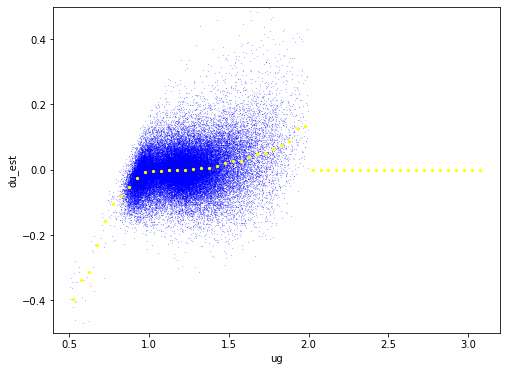

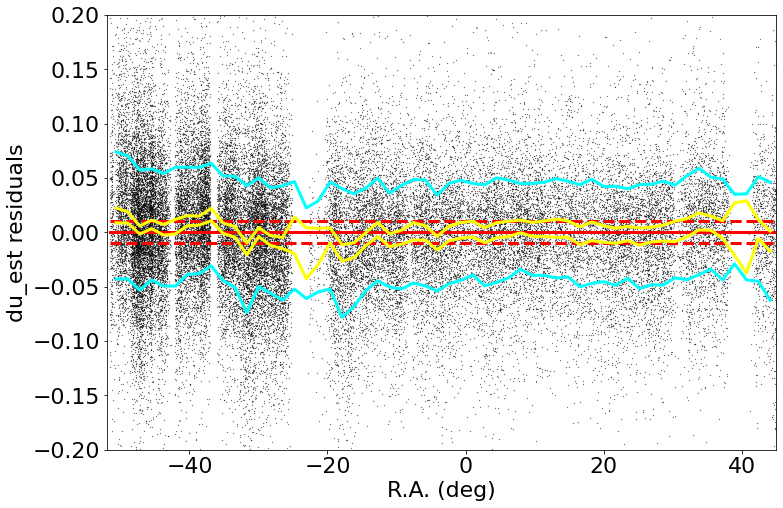

made plot colorResidGALEXug_du_est_RA.png
-----------
 stats for Dec binning medians:
medianAll: 2.5320290113286592e-05 std.dev.All: 0.05016311215404037
N= 50560 min= -0.2930821702993374 max= 0.29807492164699717
median: 0.0002480202370112156 std.dev: 0.00601233331538192
saved plot as: colorResidGALEXug_du_est_Dec.png


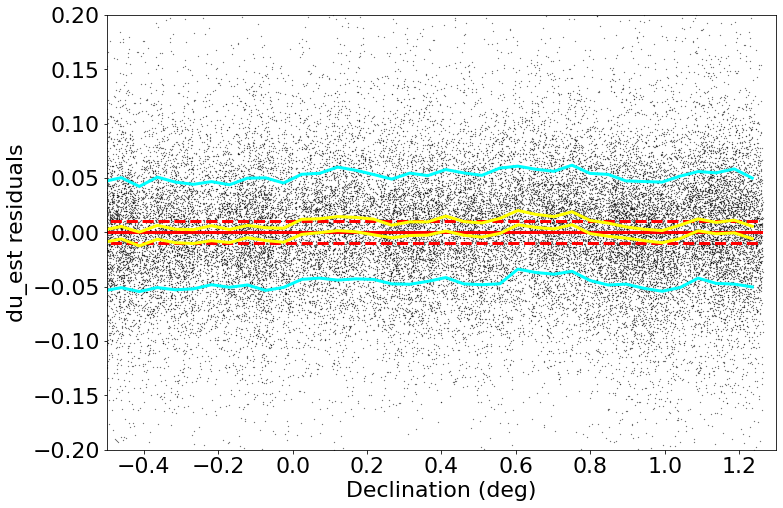

medianAll: 9.747828473941132e-05 std.dev.All: 0.05020310186442857
N= 50635 min= -0.38960286418649326 max= 0.5914421950640081
median: 0.00019873132949884222 std.dev: 0.005929526456258842
saved plot as: colorResidGALEXug_Dec_Hess.png


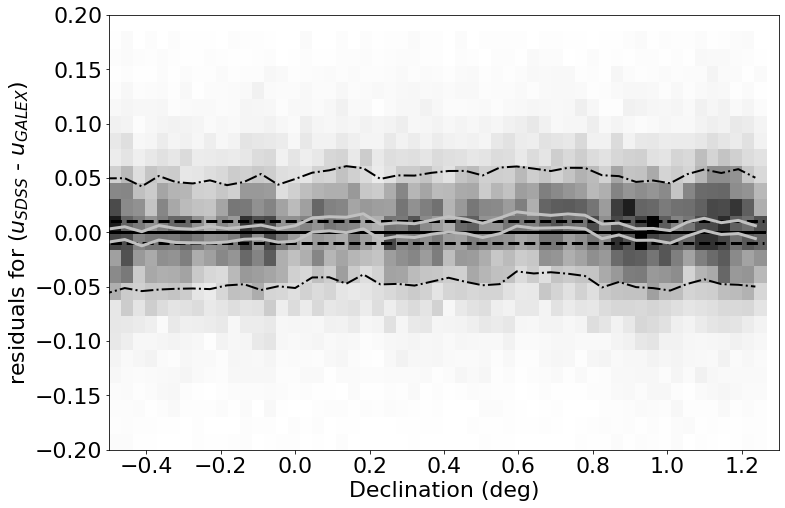

made plot colorResidGALEXug_du_est_Dec.png
-----------
 stats for SDSS u binning medians:
medianAll: 2.5320290113286592e-05 std.dev.All: 0.05016311215404037
N= 50560 min= -0.2930821702993374 max= 0.29807492164699717
median: 0.0056103328915003085 std.dev: 0.025577779001004258
saved plot as: colorResidGALEXug_du_est_umag.png


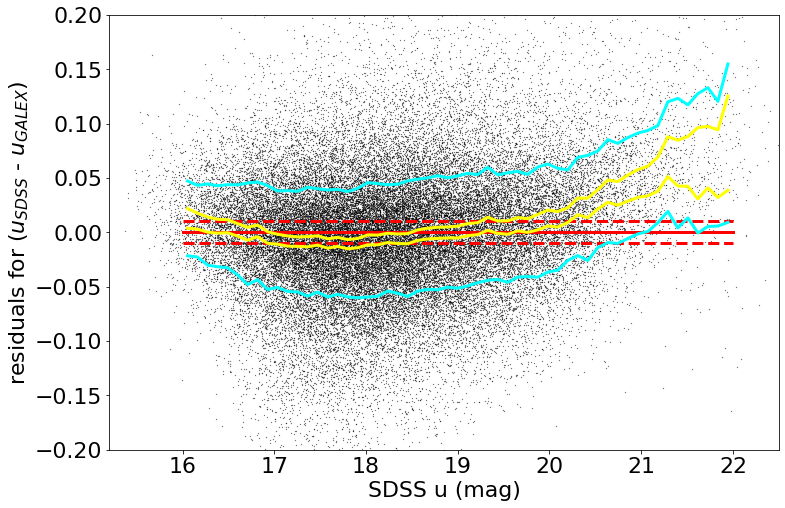

made plot colorResidGALEXug_du_est_umag.png
------------------------------------------------------------------
=========== WORKING ON: dra ===================
 stats for RA binning medians:
medianAll: -0.004373672157498315 std.dev.All: 0.2122821835861937
N= 17977 min= -0.29999745643999653 max= 0.2999733954842732
median: -0.004014939452724804 std.dev: 0.03193146702112594
saved plot as: colorResidGALEXug_dra_RA.png


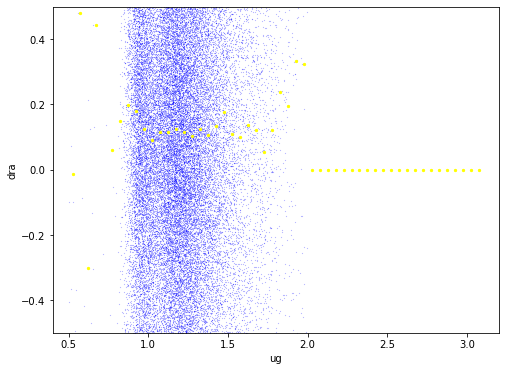

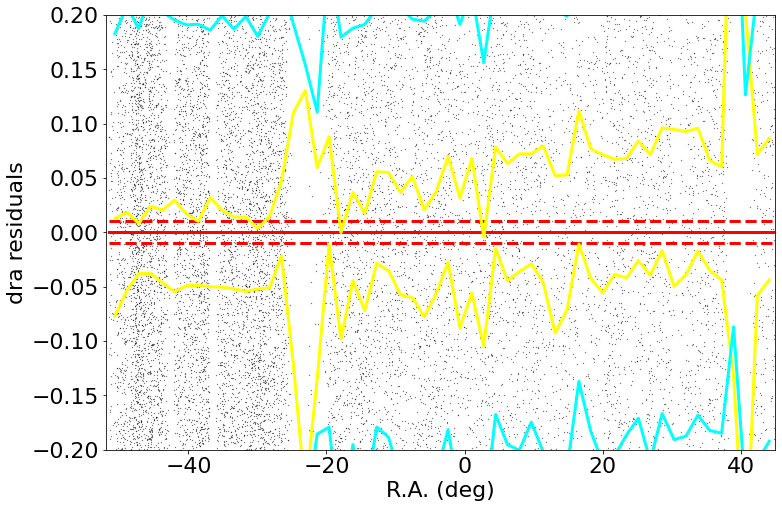

made plot colorResidGALEXug_dra_RA.png
-----------
 stats for Dec binning medians:
medianAll: -0.004373672157498315 std.dev.All: 0.2122821835861937
N= 17977 min= -0.29999745643999653 max= 0.2999733954842732
median: -0.0067113358635635875 std.dev: 0.014222758208057877
saved plot as: colorResidGALEXug_dra_Dec.png


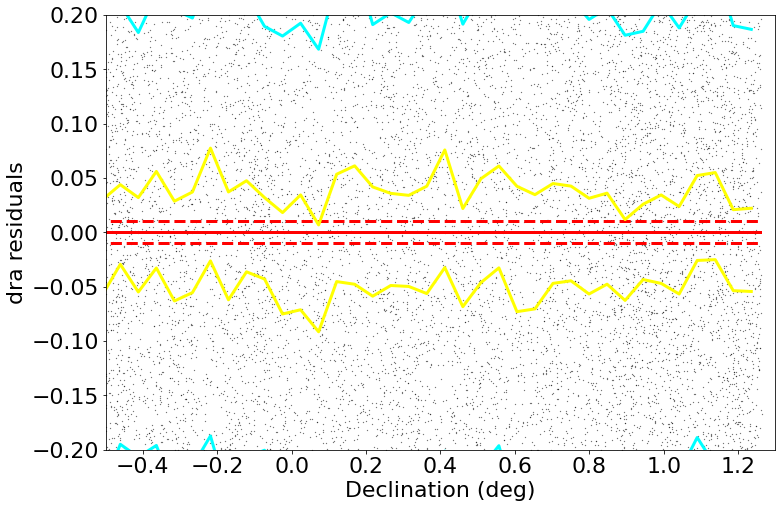

medianAll: -0.00030419543891832546 std.dev.All: 0.6668498038695968
N= 50635 min= -3.1033031500342365 max= 2.8630594589217253
median: -0.0016713542534929349 std.dev: 0.02518979167707612
saved plot as: colorResidGALEXug_Dec_Hess.png


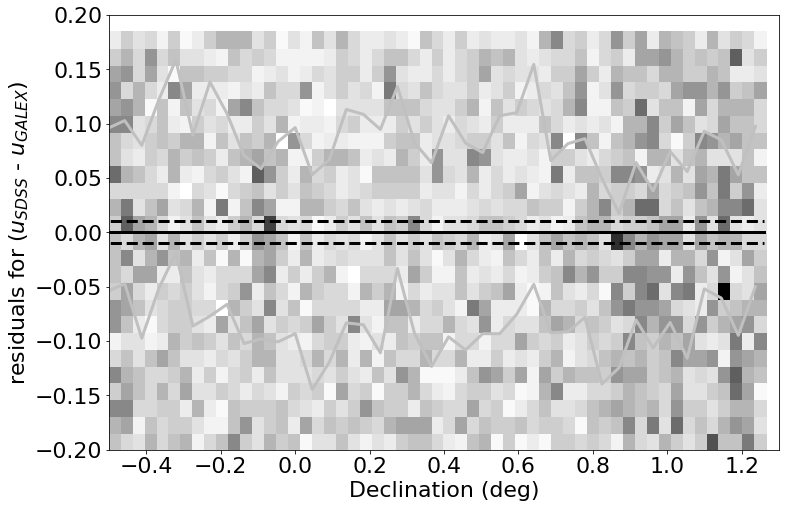

made plot colorResidGALEXug_dra_Dec.png
-----------
 stats for SDSS u binning medians:
medianAll: -0.004373672157498315 std.dev.All: 0.2122821835861937
N= 17977 min= -0.29999745643999653 max= 0.2999733954842732
median: -0.004323155742671385 std.dev: 0.040264229333657926
saved plot as: colorResidGALEXug_dra_umag.png


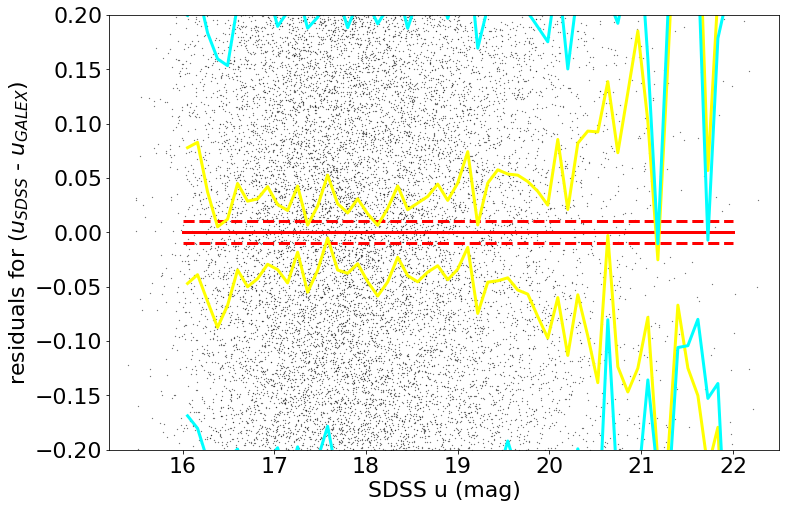

made plot colorResidGALEXug_dra_umag.png
------------------------------------------------------------------
=========== WORKING ON: ddec ===================
 stats for RA binning medians:
medianAll: -0.0015177032065292195 std.dev.All: 0.21258852056650954
N= 17914 min= -0.2999995678316208 max= 0.29998412358592363
median: -0.00782837209961576 std.dev: 0.03130874320247961
saved plot as: colorResidGALEXug_ddec_RA.png


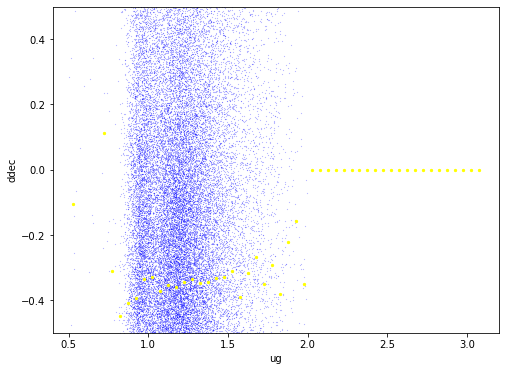

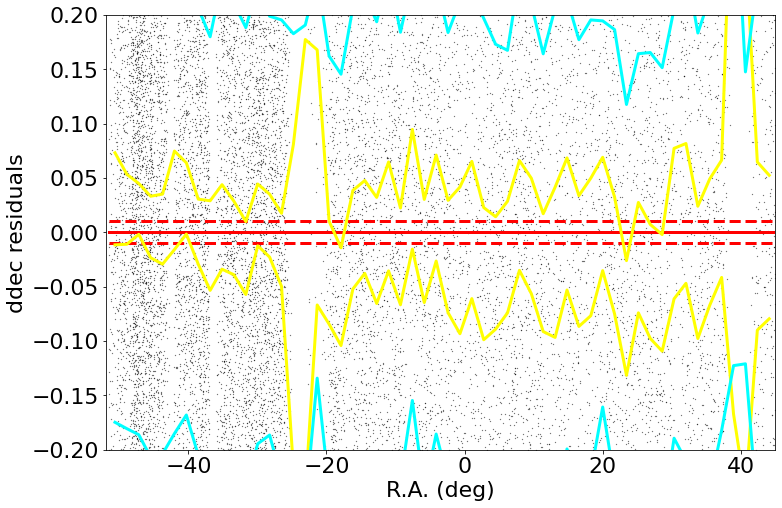

made plot colorResidGALEXug_ddec_RA.png
-----------
 stats for Dec binning medians:
medianAll: -0.0015177032065292195 std.dev.All: 0.21258852056650954
N= 17914 min= -0.2999995678316208 max= 0.29998412358592363
median: -0.0025491193387458533 std.dev: 0.018645062074835867
saved plot as: colorResidGALEXug_ddec_Dec.png


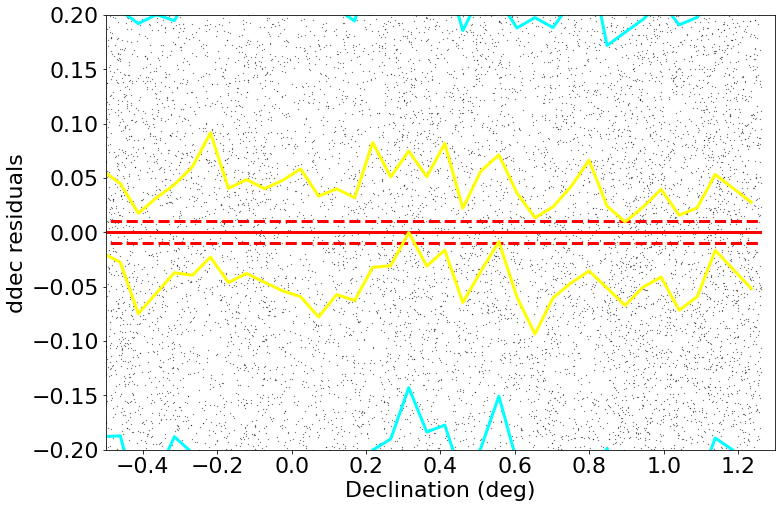

medianAll: -6.823736212868692e-05 std.dev.All: 0.6701966598939166
N= 50635 min= -2.661941191890433 max= 3.3334486590725763
median: 0.00663819970260332 std.dev: 0.030436168569756852
saved plot as: colorResidGALEXug_Dec_Hess.png


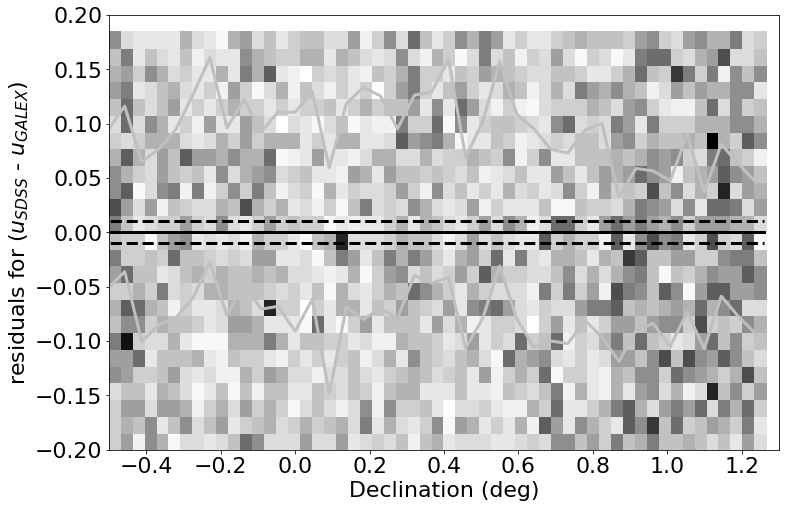

made plot colorResidGALEXug_ddec_Dec.png
-----------
 stats for SDSS u binning medians:
medianAll: -0.0015177032065292195 std.dev.All: 0.21258852056650954
N= 17914 min= -0.2999995678316208 max= 0.29998412358592363
median: -0.005278610246866738 std.dev: 0.02791094762348003
saved plot as: colorResidGALEXug_ddec_umag.png


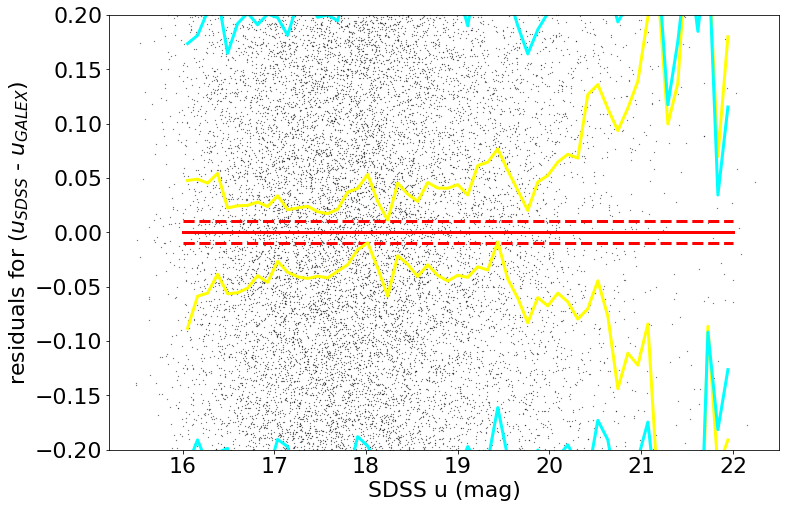

made plot colorResidGALEXug_ddec_umag.png
------------------------------------------------------------------


In [22]:
# Note, that even with the transformation equation used above, 
#  Zeljko's method improves upon it...
# So it makes sense to use the transformation equation to "get
#  to the right ballpark" and then use Zeljko's method to 
#  refine the results...
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXug_', "symbSize":0.05}
for color in ('du_est', 'dra', 'ddec'):
    keywords["Ystr"] = color 
    doOneColor(sdssGALEXug, keywords)

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: 2.5320290113286592e-05 std.dev.All: 0.05016311215404037
N= 50560 min= -0.2930821702993374 max= 0.29807492164699717
median: 0.0008983519226104237 std.dev: 0.00764711816062726
saved plot as: colorResidGALEXug_du_est_RA.png


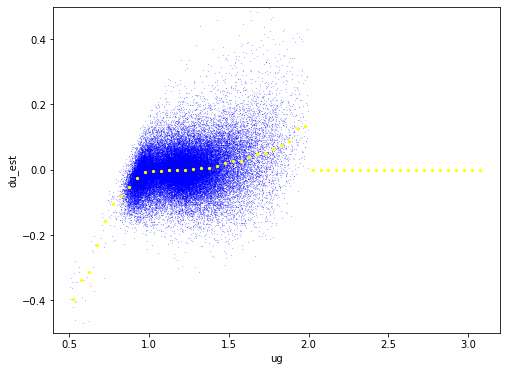

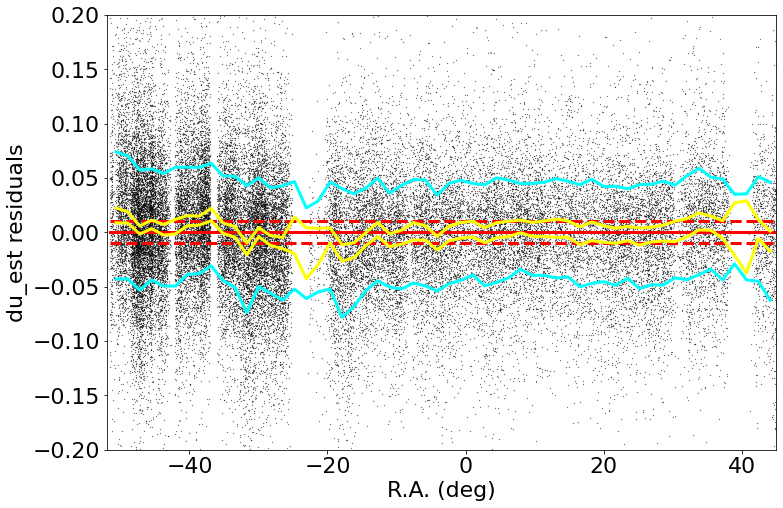

made plot colorResidGALEXug_du_est_RA.png
-----------
 stats for Dec binning medians:
medianAll: 2.5320290113286592e-05 std.dev.All: 0.05016311215404037
N= 50560 min= -0.2930821702993374 max= 0.29807492164699717
median: 0.0002480202370112156 std.dev: 0.00601233331538192
saved plot as: colorResidGALEXug_du_est_Dec.png


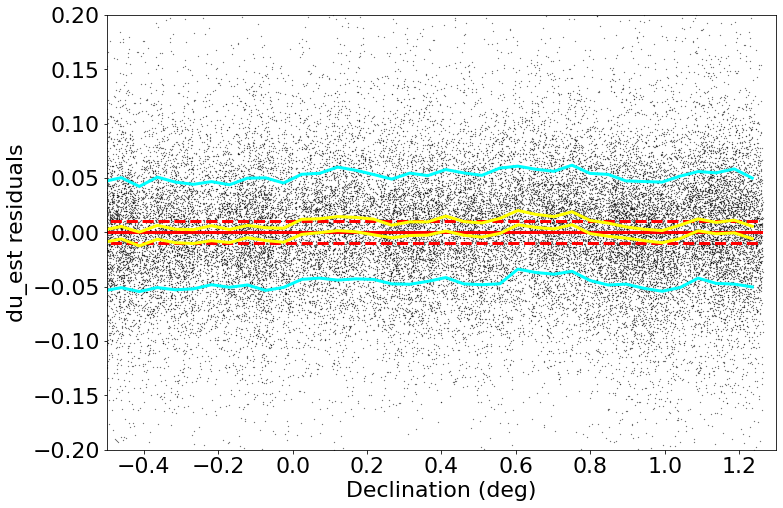

medianAll: 9.747828473941132e-05 std.dev.All: 0.05020310186442857
N= 50635 min= -0.38960286418649326 max= 0.5914421950640081
median: 0.00019873132949884222 std.dev: 0.005929526456258842
saved plot as: colorResidGALEXug_Dec_Hess.png


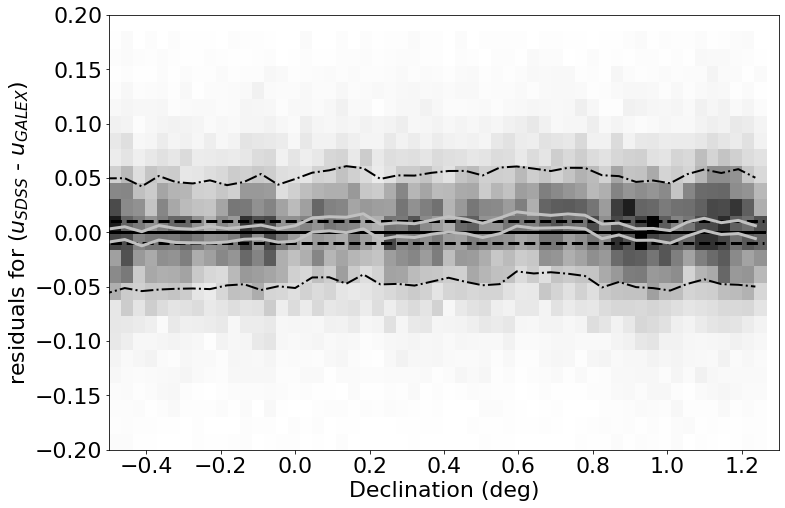

made plot colorResidGALEXug_du_est_Dec.png
-----------
 stats for SDSS u binning medians:
medianAll: 2.5320290113286592e-05 std.dev.All: 0.05016311215404037
N= 50560 min= -0.2930821702993374 max= 0.29807492164699717
median: 0.0056103328915003085 std.dev: 0.025577779001004258
saved plot as: colorResidGALEXug_du_est_umag.png


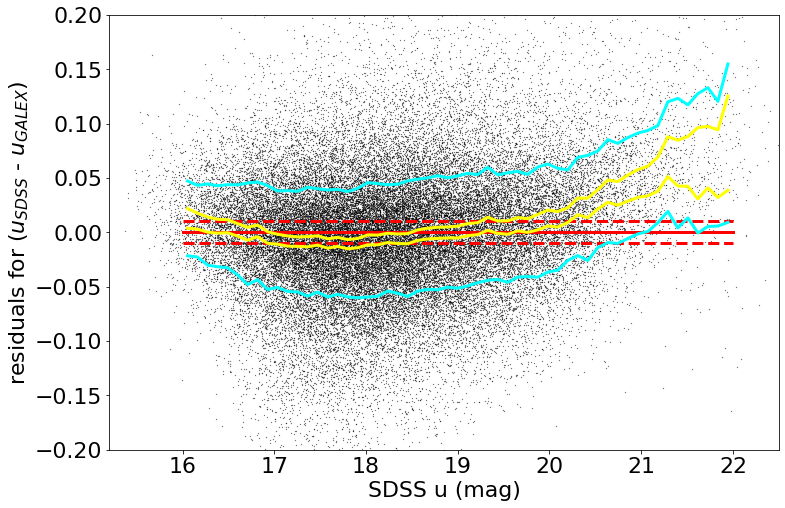

made plot colorResidGALEXug_du_est_umag.png
------------------------------------------------------------------


In [23]:
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXug_', "symbSize":0.05}
color = 'du_est' 
keywords["Ystr"] = color 
doOneColor(sdssGALEXug, keywords)

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: -3.4915085026072067e-06 std.dev.All: 0.049433625561095956
N= 49232 min= -0.29259685339933417 max= 0.2989788603110052
median: 0.0015563464586221963 std.dev: 0.007526471174695444
saved plot as: colorResidGALEXbright_du_est_RA.png


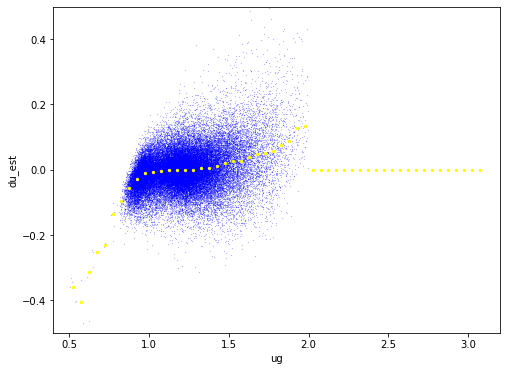

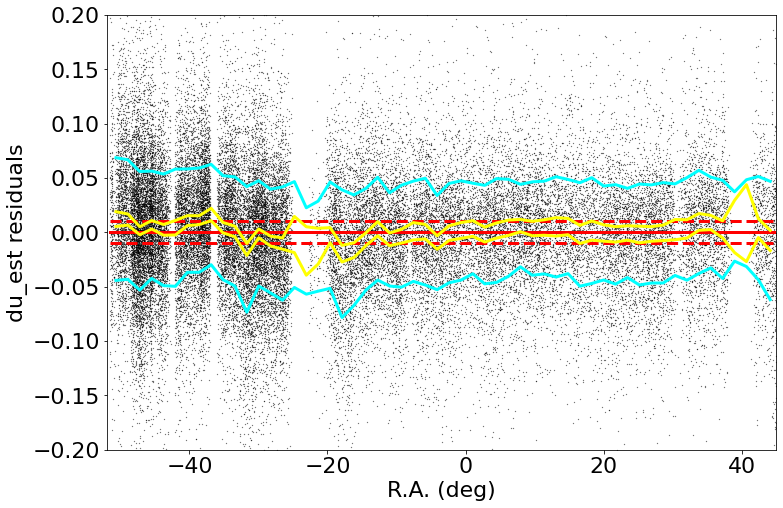

made plot colorResidGALEXbright_du_est_RA.png
-----------
 stats for Dec binning medians:
medianAll: -3.4915085026072067e-06 std.dev.All: 0.049433625561095956
N= 49232 min= -0.29259685339933417 max= 0.2989788603110052
median: 0.00012528936800064244 std.dev: 0.005927391790578682
saved plot as: colorResidGALEXbright_du_est_Dec.png


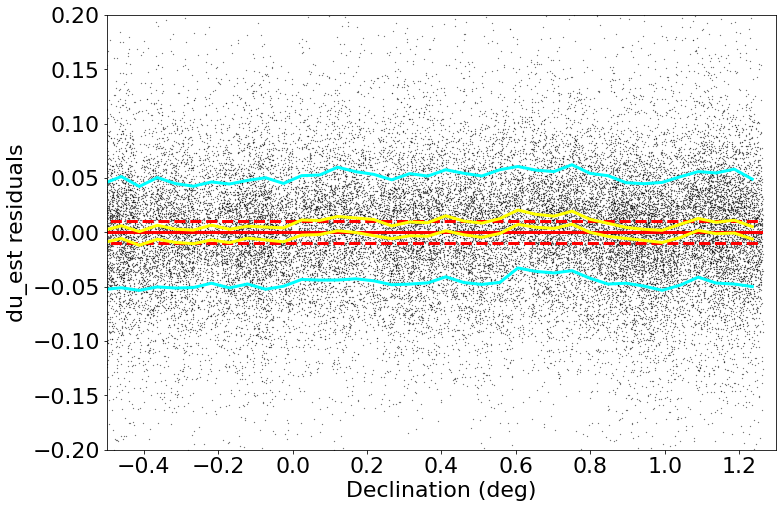

medianAll: 9.747828473941132e-05 std.dev.All: 0.05020310186442857
N= 50635 min= -0.38960286418649326 max= 0.5914421950640081
median: 0.00019873132949884222 std.dev: 0.005929526456258842
saved plot as: colorResidGALEXug_Dec_Hess.png


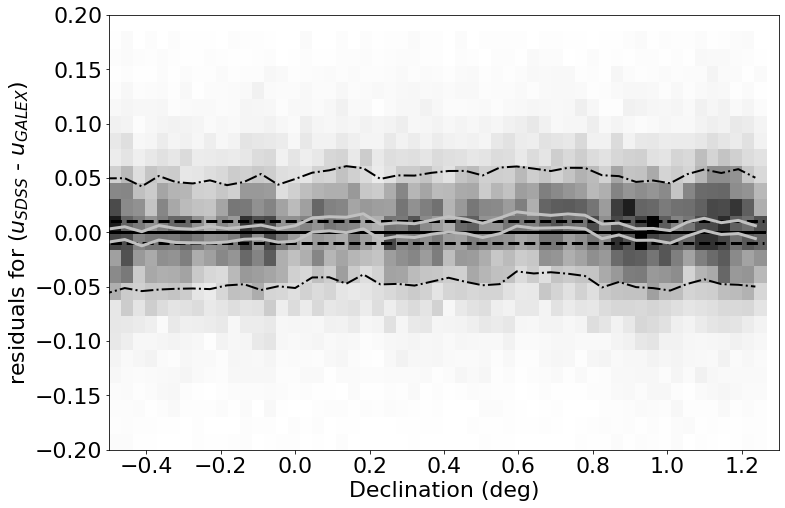

made plot colorResidGALEXbright_du_est_Dec.png
-----------
 stats for SDSS u binning medians:
medianAll: -3.4915085026072067e-06 std.dev.All: 0.049433625561095956
N= 49232 min= -0.29259685339933417 max= 0.2989788603110052
median: 0.005683080198875203 std.dev: 0.01913065797571685
saved plot as: colorResidGALEXbright_du_est_umag.png


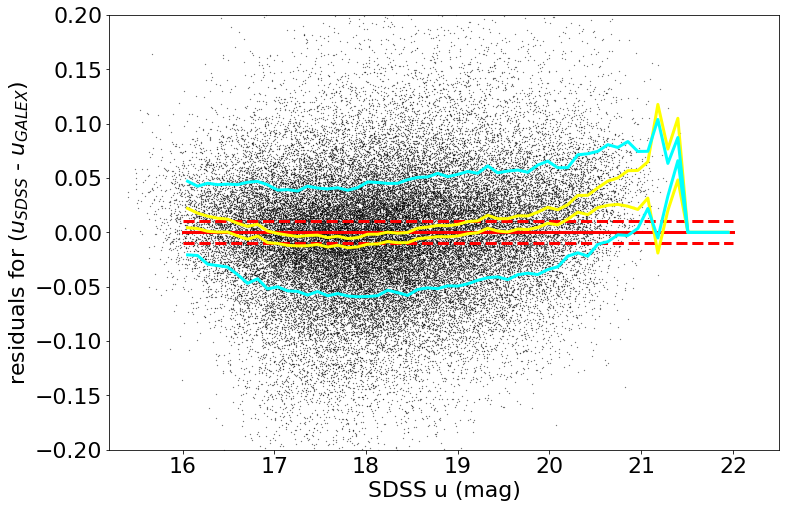

made plot colorResidGALEXbright_du_est_umag.png
------------------------------------------------------------------
=========== WORKING ON: dra ===================
 stats for RA binning medians:
medianAll: -0.004327065269837373 std.dev.All: 0.2123675620332409
N= 17718 min= -0.29999512177761295 max= 0.2999923586088471
median: -0.003015784811493387 std.dev: 0.031665375171637054
saved plot as: colorResidGALEXbright_dra_RA.png


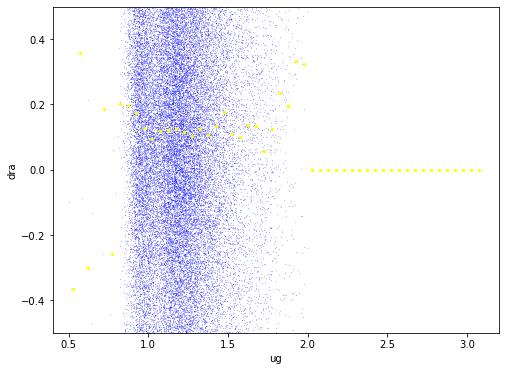

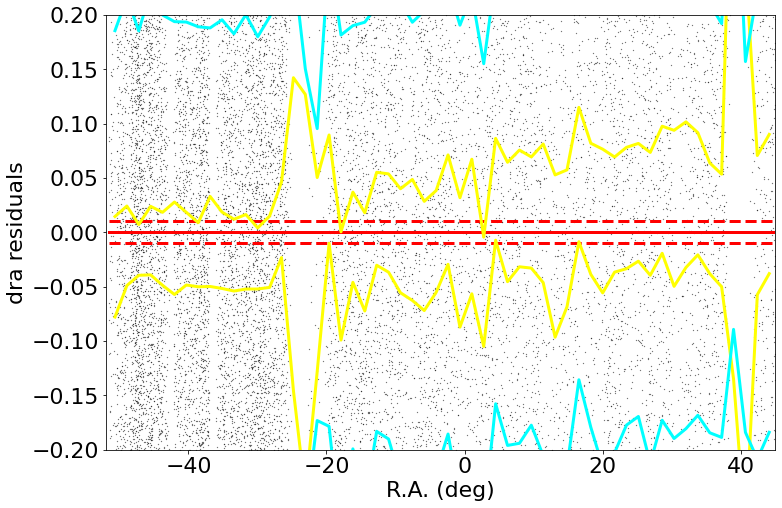

made plot colorResidGALEXbright_dra_RA.png
-----------
 stats for Dec binning medians:
medianAll: -0.004327065269837373 std.dev.All: 0.2123675620332409
N= 17718 min= -0.29999512177761295 max= 0.2999923586088471
median: -0.007798027682077834 std.dev: 0.014194832993646123
saved plot as: colorResidGALEXbright_dra_Dec.png


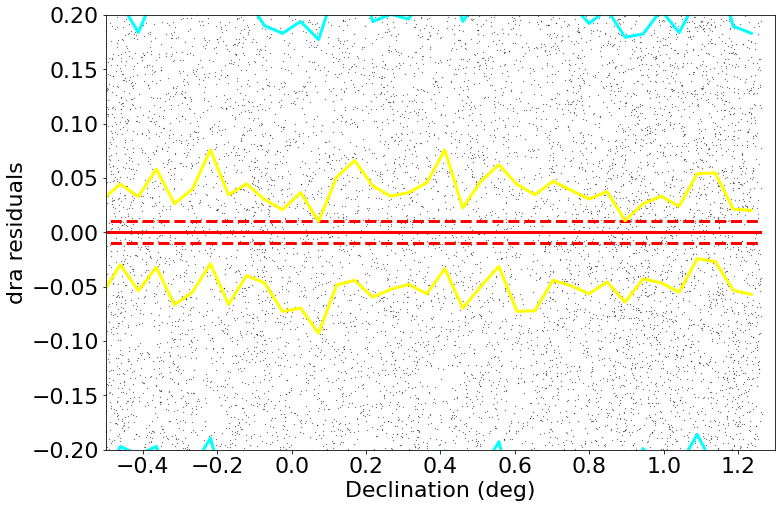

medianAll: 9.747828473941132e-05 std.dev.All: 0.05020310186442857
N= 50635 min= -0.38960286418649326 max= 0.5914421950640081
median: 0.00019873132949884222 std.dev: 0.005929526456258842


In [ ]:
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXbright_', "symbSize":0.05}
for color in ('du_est', 'dra', 'ddec'):
    keywords["Ystr"] = color 
    doOneColor(sdssGALEXbright, keywords)

In [ ]:
#plotName = 'colorResidGALEXbright_CFISupsfVSuauto.png' 
#Ylabel = 'CFIS upsf-uauto (mag)'
#kwOC = {"Xstr":'upsf', "Xmin":15, "Xmax":22, "Xlabel":'CFIS upsf (mag)', \
#          "Ystr":'duCFIS', "Ymin":-0.07, "Ymax":0.07, "Ylabel":Ylabel, \
#          "XminBin":15.5, "XmaxBin":21.5, "nBin":55, \
#          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":0.05}
#zit.plotdelMag(sdssCFISbright, kwOC)

In [ ]:
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEX_Gaia_', "symbSize":0.05}
keywords["Ystr"] = 'du_est' 
doOneColorRA(sdssGALEXbright, keywords)

In [ ]:
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEX_Gaia_', "symbSize":0.05}
keywords["Ystr"] = 'du_est' 
doOneColorDec(sdssGALEXbright, keywords)

In [ ]:
sdssGALEX

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(sdssGALEX['u_mMed'], sdssGALEX['u_rms_scatt'], s=0.01, c='blue')
ax.set_xlim(12,22)
ax.set_ylim(0.0,0.2)